In [ ]:
# #Consider the “Academic performance” dataset of students (Academic_Performance_Dataset.csv) and perform the
# following operations using Python.
# a) Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any
# of the suitable techniques to deal with them.
# b) Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
# c) Apply data transformations on categorical variables to convert it into numerical variables.
# Reason and document your approach properly.

In [17]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/Academic.csv")

In [6]:
df

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,SB11201420568705,M,Yes,Yes,ACADEMIC,MECHATRONICS ENGINEERING,88.0,71.0,86.0,87.0,65.0,88,FIRST CLASS
12407,SB11201420573045,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,46.0,39.0,44.0,11.0,0.0,4,FIRST CLASS
12408,SB11201420578809,M,Yes,No,ACADEMIC,INDUSTRIAL ENGINEERING,98.0,88.0,90.0,81.0,87.0,95,FIRST CLASS
12409,SB11201420578812,F,Yes,Yes,ACADEMIC,NaN,60.0,80.0,51.0,8.0,42.0,50,FIRST CLASS


In [8]:
df.describe()

,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE
count,12400.000000,12403.000000,12397.000000,12397.000000,12389.000000,12411.000000
mean,77.385887,62.191728,59.189562,67.501815,53.690532,68.446459
std,22.716227,27.669357,29.002446,25.505280,30.007993,25.867550
min,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,65.000000,42.000000,36.000000,51.000000,28.000000,51.000000
50%,85.000000,67.000000,65.000000,74.000000,56.000000,75.000000
75%,96.000000,86.000000,85.000000,88.000000,80.000000,90.000000
max,100.000000,100.000000,122.000000,111.000000,107.000000,100.000000


In [10]:
df.dtypes

STUDENT_ID             object
GENDER                 object
PLACEMENT              object
HONOR_OPTED_OR_NOT     object
EDUCATION_TYPE         object
ACADEMIC_PROGRAM       object
COURSE 1 MARKS        float64
COURSE 2 MARKS        float64
COURSE 3 MARKS        float64
COURSE 4 MARKS        float64
COURSE 5 MARKS        float64
PERCENTILE              int64
OVEARLL_GRADE          object
dtype: object

In [11]:
df.shape

(12411, 13)

In [12]:
df.isnull().sum()

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer

In [18]:
imputer = SimpleImputer(strategy = "mean", missing_values = np.nan)
imputer1 = SimpleImputer(strategy = "most_frequent", missing_values = np.nan)

In [19]:
df[['COURSE 1 MARKS', 'COURSE 2 MARKS', 'COURSE 3 MARKS', 'COURSE 4 MARKS', 'COURSE 5 MARKS']] = imputer.fit_transform(df[['COURSE 1 MARKS', 'COURSE 2 MARKS', 'COURSE 3 MARKS', 'COURSE 4 MARKS', 'COURSE 5 MARKS']])
df[['PERCENTILE', 'GENDER', 'PLACEMENT', 'EDUCATION_TYPE', 'ACADEMIC_PROGRAM']] = imputer1.fit_transform(df[['PERCENTILE', 'GENDER', 'PLACEMENT', 'EDUCATION_TYPE', 'ACADEMIC_PROGRAM']])

In [20]:
df.isnull().sum()

STUDENT_ID             0
GENDER                 0
PLACEMENT              0
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE         0
ACADEMIC_PROGRAM       0
COURSE 1 MARKS         0
COURSE 2 MARKS         0
COURSE 3 MARKS         0
COURSE 4 MARKS         0
COURSE 5 MARKS         0
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

In [21]:
df['HONOR_OPTED_OR_NOT'] =  df['HONOR_OPTED_OR_NOT'].fillna('no')

In [22]:
df.isnull().sum()

STUDENT_ID            0
GENDER                0
PLACEMENT             0
HONOR_OPTED_OR_NOT    0
EDUCATION_TYPE        0
ACADEMIC_PROGRAM      0
COURSE 1 MARKS        0
COURSE 2 MARKS        0
COURSE 3 MARKS        0
COURSE 4 MARKS        0
COURSE 5 MARKS        0
PERCENTILE            0
OVEARLL_GRADE         0
dtype: int64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

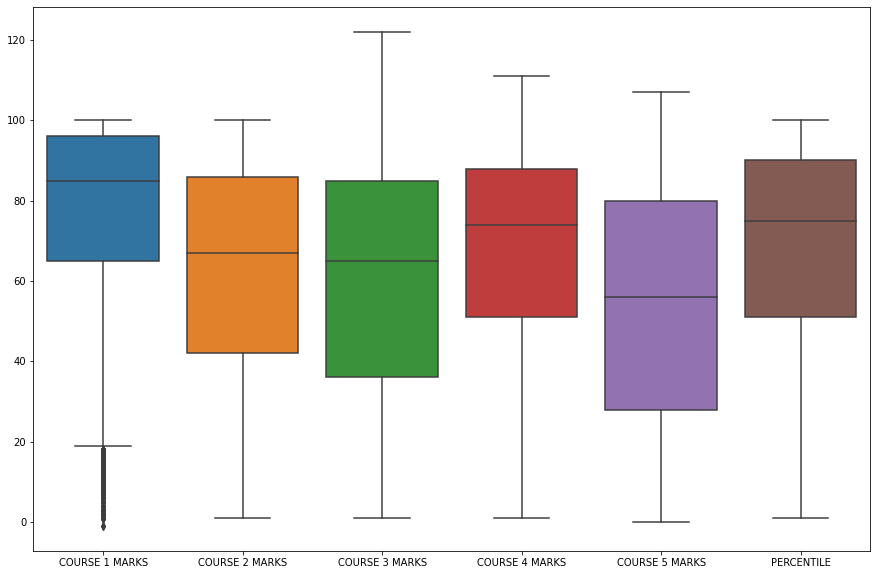

In [26]:
plt.figure(figsize = (15, 10))
sns.boxplot(data=df)

In [33]:
outliers = []
def print_outliers(data):
    thresh = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if(np.abs(z_score)>thresh):
            outliers.append(i)
    return outliers

test = print_outliers(df['COURSE 1 MARKS'])
print(test)

[4.0, 6.0, 3.0, 1.0, 5.0, 2.0, 8.0, 7.0, 2.0, 8.0, 6.0, 9.0, 2.0, 9.0, 8.0, 1.0, 9.0, 2.0, 2.0, 1.0, 6.0, 7.0, 4.0, 5.0, 9.0, 7.0, 9.0, 1.0, 2.0, 8.0, 5.0, 2.0, 8.0, 8.0, 1.0, 4.0, 7.0, 4.0, 7.0, 8.0, 3.0, 8.0, 5.0, 9.0, 7.0, 8.0, 7.0, 1.0, 9.0, 2.0, 7.0, 5.0, 3.0, 7.0, 3.0, 8.0, 6.0, 9.0, 8.0, 9.0, 6.0, 1.0, 7.0, 8.0, 1.0, 9.0, 1.0, 7.0, 8.0, 9.0, 6.0, 7.0, 7.0, 8.0, 4.0, 6.0, 6.0, 5.0, -1.0, 8.0, 8.0, 3.0, 1.0, 3.0, 3.0, 2.0, 9.0, 8.0, 3.0, 6.0, 3.0, 2.0, 7.0, 8.0, 4.0, 8.0, 3.0, 7.0, 9.0, 9.0, 3.0, 7.0, 6.0, 1.0, 1.0, 1.0, -1.0, 9.0, 4.0, 8.0, 7.0, 1.0, 6.0]


In [37]:
q1 = df['COURSE 1 MARKS'].quantile(0.25)
q3 = df['COURSE 1 MARKS'].quantile(0.75)
IQR = q3-q1
l_bound = q1 - (IQR*1.5)
u_bound = q3 - (IQR*1.5)

In [39]:
df = df[df['COURSE 1 MARKS'] > l_bound]
df = df[df['COURSE 1 MARKS'] < u_bound]

<AxesSubplot:>

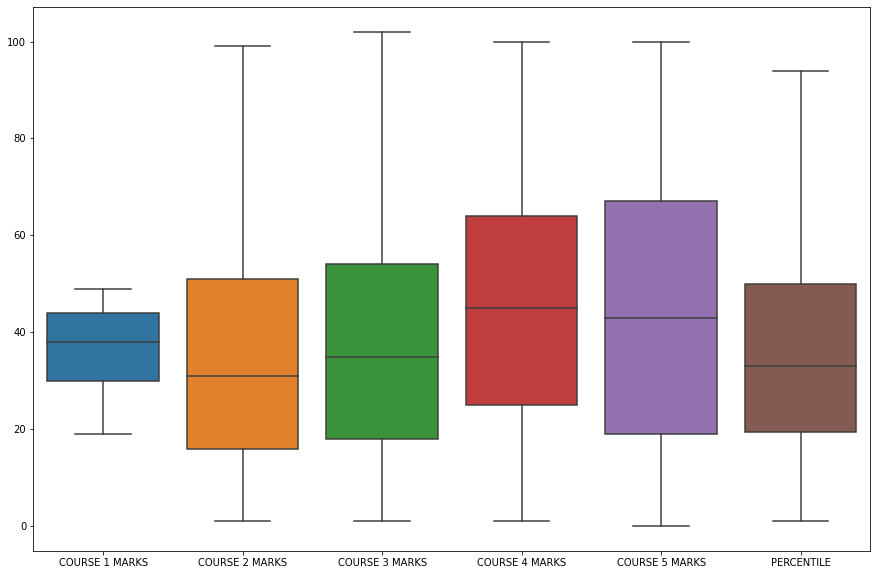

In [42]:
plt.figure(figsize = (15,10))
sns.boxplot(data=df)